Nous avons déjà commencé à voir comment rendre compte d'une mesure unique avec son incertitude, nous allons maintenant voir comment rendre compte d'un groupe de résultat.

# Rendre compte de résultats expérimentaux

## Résultat unique
Pour rappel, __un résultat de mesure unique avec incertitude doit s'écrire sous la forme :__

$$
G = (G_{mes} \pm u(G)) Unités
$$

Vous devez respectez les contraintes suivantes :
* L'incertitude de mesure doit avoir 2 chiffres significatifs
* La valeur mesure doit avoir la même précision que l'incertitude ne mesure.

```{margin}
Vous pouvez utiliser des puissances de 10 en facteur si c'est nécessaire.
```

## Ensemble de résultats
Pour rendre compte (afficher proprement) d'un ensemble de résultats, on peut utiliser plusieurs moyens techniques:
* tableau markdown dans un notebook (_très verbeux et ne permet pas directement de manipuler les résultats_)
* __tableur (LibreOffice Calc, Excel...) : pratique pour l'affichage ET la manipulation des résultats__
* (HP) pandas : bibliothèque Python permettant de manipuler des données ET de les afficher de façon propre. C'est très pratique dans un notebook.

Dans tous les cas, plusieurs points sont à respecter :
* Bien préciser le contenu des colonnes et les __unités__ des grandeurs (en-tête c'est plus simple).
* Si la détermination des __incertitudes de mesure__ est importante, réservez une colonne pour ces dernières.
* Pour un tableur, utilisez les __formules de calcul du logiciel__ plutôt que tout calculer "à la main".

__Dans tous les cas, préfèrez un système (tableur ou numpy) qui permet d'automatiser les calculs à faire sur les résultats.__

```{margin}
Dans les premiers TP, l'utilisation des notebook vous obligera à surtout utiliser numpy pour manipuler un ensemble de résultat.
Les méthodes de compte-rendu seront alors souvent guidées. Etudiez ces méthodes pour pouvoir les reproduire.
```

## Représentation graphique
Les représentations graphiques sont très utiles pour :
* Faire une synthèse rapide et visuelle des résultats. Possiblement des comparaisons.
* Tester visuellement une relation possible entre deux mesurandes.

### Moyens techniques
Vous disposerez principalement de trois méthodes pour obtenir des représentations graphiques :
* Logiciel métier associé à un instrument de mesure (console d'acquisition, oscilloscope, spectromètre...)
* Tableur (LibreOffice, Excel)
* __matplotlib__

La bibliothèque `matplotlib.pyplot` sera utilisée en priorité dans un premier temps, c'est pourquoi les exemples d'applications seront présentés avec ce moyen.

```{margin}
L'utilisation de `matplotlib` n'impose pas l'utilisation de `numpy` mais c'est fortement recommandé.
```

### (Rappel) Consignes de tracés
```{attention}
Par la suite, les fonctions utilisées viennent de la bibliothèque `matplotlib.pyplot` et soit:
* elles sont appliquées directement à un objet existant (par exemple des axes `ax`). On peut alors utiliser la syntaxe `ax.fonction(...)`
* sinon (cas de `subplots` et de `show`), il ne faut pas oublier l'alias utilisé lors de l'import de matplotlib.pyplot (par exemple `plt.subplots(...)`).
```

```{hint}
Pour créer une figure et des axes dans la figure, vous utiliserez la fonction `f, ax = plt.subplots()` qui créé une fenêtre graphique enregistrée dans la
variable `f` et des axes dans cette fenêtre enregistrée dans la variable `ax`.
```

Une représentation graphique doit toujours :
```{margin}
Syntaxe : la fenêtre graphique s'appellera `f` et les axes `ax` dans les codes donnés ici
```
* Avoir un titre (`f.suptitle("Titre")`)
* Avoir des axes légendés (`ax.set_xlabel("Legende")` et `ax.set_xlabel("Légende")`)
* Une légende s'il y a plusieurs courbes :
   * l'option `label="Nom de légende"` dans la fonction `plot, hist, errorbar` permet de donner un nom à la courbe
   * la fonction `ax.legend()` permet d'afficher la légende sur le graphique.

### Types de tracés sous matplotlib
On sera amenés à tracer trois types de graphiques :
* des histogrammes (pour les distribution de valeur) : `ax.hist(valeurs, bins=...)`
	* `valeurs` est un vecteurs de valeurs (ou une liste de vecteurs pour tracés plusieurs histogrammes)
	* `bins` est le nombre de bâtons de l'histogramme 
	```{margin}
	on peut utiliser `bins = "rice"` pour une détermination automatique du nombre de bâtons
	```
* des nuages de points sans incertitude ou des courbes (théoriques ou modèles) ! `ax.plot(x, y)`
    * `x` et `y` sont des vecteurs contenant les abscisses et ordonnées.
    * D'autres options de formattage peuvent être utiles :
        * `linewidth`
        * `linestyle` (valeurs possibles : `"-", "--", "-.", ".", ""`)
        ```{margin}
        La valeur est `""` est souvent utile quand on ne veut pas relier les points de mesure.
        ```
        * `marker` (valeurs possibles : `".", "o", "+", "x"`...)
* des barres d'incertitude ou des croix d'incertitudes (cf. suite) : `ax.errorbar(x, y, xerr=ux, yerr=uy)`
	* `x` et `y` sont des vecteurs contenant les abscisses et ordonnées.
	* `ux` et `uy` sont des __vecteurs__ contenant les incertitudes sur les abscisses et ordonnées
	```{margin}
	Elles sont optionnelles, on peut ne mettre que `yerr`
	```

```{note}
Des options supplémentaires existent comme `color` ou `label`
```

### Un exemple de script sous matplotlib
Vous trouverez dans la cellule ci-dessous un exemple de structure de code permettant de tracé un nuage de points de mesures avec leurs incertitudes. Nous allons ainsi voir l'utilisation des croix d'incertitudes et des barres d'incertitudes.

Essayez de garder une structure similaire pour éviter de perdre du temps à retrouver les commandes.

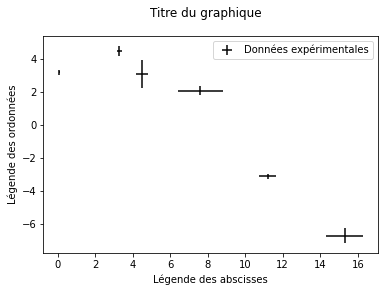

In [1]:
"""
On rappelle qu'il est important d'importer matplotlib.pyplot.
On importe aussi numpy car il est très souvent utilisé.
"""
import matplotlib.pyplot as plt
import numpy as np

"""
Il faudra en général entrer vous-même vos données expérimentales dans un vecteur numpy
"""
x = np.array([0.1, 3.3, 4.5, 7.6, 11.2, 15.3])  # Préférez ordonner les abscisses par ordre croissant quand vous le pouvez.
y = np.array([3.2, 4.5, 3.1, 2.1, -3.1, -6.7])

x_err = [0.04, 0.12, 0.34, 1.2, 0.45, 0.98]  # En pratique x_err et y_err sont souvent calculés par Monte-Carlo.
y_err = [0.14, 0.32, 0.84, 0.3, 0.15, 0.48]
# Remarque évitez de nommer les vecteurs incertitudes xerr et yerr.


"""
On crée ensuite la fenêtre graphique avec son titre et ses axes légendés
"""
f, ax = plt.subplots()
f.suptitle("Titre du graphique")
ax.set_xlabel("Légende des abscisses")
ax.set_ylabel("Légende des ordonnées")

"""
On crée ensuite les tracés. On va ici tracer des points expérimentaux
avec leurs incertitudes (abcisses et ordonnées). On va donc utiliser la fonction
errorbar.
On ne va pas relier les points : linestyle='' (ou linestyle=None)
On ne va pas mettre de marqueurs (il y a les croix d'incertitudes) : marker=''
On met une légende : label="Données expérimentales"
On choisit la couleur : color="black"
"""
ax.errorbar(x, y, xerr=x_err, yerr=y_err, linestyle='', marker='', label="Données expérimentales", color="black")

"""
On affiche la légende (après le tracé des courbes)
"""
ax.legend()


"""
On demande d'afficher le graphique (Note : dans un notebook, cette commande n'est pas toujours nécessaire mais prenez l'habitude de l'utiliser)
car elle est indispensable si vous utilisez spyder, idle ou pyzo (ou en ligne de commande).
"""
plt.show()

### Remarques
Dans un traitement plus évolué, on peut même ajouter du texte, des flèches pour montrer certains points, faire des tracés semi-logarithmiques... Ces éléments avancés seront rarement utilisés et lorsque c'est le cas, le code à utiliser sera donné.

On peut aussi tracer des barre d'incertitude si l'on n'a que des incertitudes sur les ordonnées (ou si celle sur les abscisses sont considérées comme négligeable). La cellule ci-dessous en donne un exemple avec les données précédentes si les x n'avait pas d'incertitude.

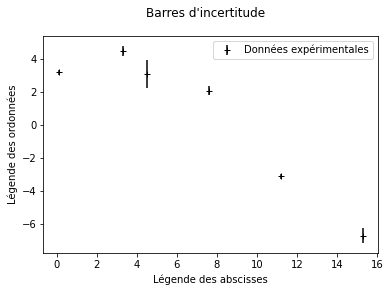

In [2]:
"""
On crée ensuite la fenere graphique avec son titre et ses axes légendés.
On a changé le nom de la figure et des axes (f1 et xa3) pour rappeler que le nom de ces variables est arbitraire. C'est vous qui le choisissez.
"""
f1, xa3 = plt.subplots()
f1.suptitle("Barres d'incertitude")
xa3.set_xlabel("Légende des abscisses")
xa3.set_ylabel("Légende des ordonnées")

"""
On crée ensuite les tracés. On va ici tracer des points expérimentaux
avec leurs incertitudes (abcisses et ordonnées). On va donc utiliser la fonction
errorbar.
On ne va pas relier les points : linestyle='' (ou linestyle=None)
On ne va pas mettre de marqueurs (il y a les croix d'incertitudes) : marker=''
On met une légende : label="Données expérimentales"
On choisit la couleur : color="black"
"""
xa3.errorbar(x, y, yerr=y_err, linestyle='', marker='+', label="Données expérimentales", color="black")

"""
On affiche la légende (après le tracé des courbes)
"""
xa3.legend()


"""
On demande d'afficher le graphique (Note : dans un notebook, cette commande n'est pas toujours nécessaire mais prenez l'habitude de l'utiliser)
car elle est indispensable si vous utilisez spyder, idle ou pyzo (ou en ligne de commande).
"""
plt.show()